In [146]:
import sys
from os import listdir
import os

from xml.dom.minidom import parse
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [147]:
datadir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Train/MedLine/"
#datadir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Train/DrugBank/"
print(datadir)

/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Train/MedLine/


In [148]:
test_dir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Test-NER/MedLine/"
#test_dir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Test-NER/DrugBank/"
print(test_dir)

/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Test-NER/MedLine/


# Load data

In [1]:
def parse_XML_file(datadir):
    trees = []
    for f in listdir(datadir):
        # parse XML file
        tree = parse(datadir + "/" + f)
        trees.append(tree)
    return trees

def parsed_to_df(parsed):
    items = []
    for tree in parsed:
        for s in tree.getElementsByTagName("sentence"):
            s_id = s.attributes["id"].value
            s_txt = s.attributes["text"].value
            for e in s.getElementsByTagName("entity"):
                e_id = e.attributes["id"].value
                e_offset = e.attributes["charOffset"].value 
                e_name = e.attributes["text"].value
                e_type = e.attributes["type"].value
                item = {"s_id": s_id, "s_txt": s_txt, "e_id": e_id, "e_offset": e_offset, "e_name": e_name, "e_type": e_type}
                items.append(item)
                
    return pd.DataFrame(items)

def load_data(datadir, set_type):
    trees = parse_XML_file(datadir)
    df_loaded = parsed_to_df(trees)
    df_loaded['set'] = set_type
    return df_loaded

In [151]:
df = pd.DataFrame(items)
df.shape

(1836, 6)

In [152]:
df = df_drugbank.append(df_medline, ignore_index=True)
df.shape

,e_id,e_name,e_offset,e_type,s_id,s_txt
0,DDI-MedLine.d69.s0.e0,contortrostatin,70-84,drug_n,DDI-MedLine.d69.s0,Differential regulation of tyrosine phosphoryl...
1,DDI-MedLine.d69.s0.e1,echistatin,141-150,drug_n,DDI-MedLine.d69.s0,Differential regulation of tyrosine phosphoryl...
2,DDI-MedLine.d69.s0.e2,flavoridin,156-165,drug_n,DDI-MedLine.d69.s0,Differential regulation of tyrosine phosphoryl...
3,DDI-MedLine.d69.s1.e0,contortrostatin,28-42,drug_n,DDI-MedLine.d69.s1,The homodimeric disintegrin contortrostatin wa...
4,DDI-MedLine.d69.s1.e1,echistatin,96-105,drug_n,DDI-MedLine.d69.s1,The homodimeric disintegrin contortrostatin wa...


# Features

## Is upper

In [153]:
df['e_is_upper'] = df['e_name'].apply(lambda x : x.isupper())

## Suffix

In [154]:
df['e_suffix'] = df['e_name'].apply(lambda x : x[-5:])

## Plural

In [155]:
df['e_plural'] = df['e_name'].apply(lambda x : x[-1:] == 's')

## Part Of Speech

In [156]:
df['e_pos'] = df['e_name'].apply(lambda x : nltk.pos_tag([x])[0][1])

In [157]:
df

,e_id,e_name,e_offset,e_type,s_id,s_txt,e_is_upper,e_suffix,e_plural,e_pos
0,DDI-MedLine.d69.s0.e0,contortrostatin,70-84,drug_n,DDI-MedLine.d69.s0,Differential regulation of tyrosine phosphoryl...,False,tatin,False,NN
1,DDI-MedLine.d69.s0.e1,echistatin,141-150,drug_n,DDI-MedLine.d69.s0,Differential regulation of tyrosine phosphoryl...,False,tatin,False,NN
2,DDI-MedLine.d69.s0.e2,flavoridin,156-165,drug_n,DDI-MedLine.d69.s0,Differential regulation of tyrosine phosphoryl...,False,ridin,False,NN
3,DDI-MedLine.d69.s1.e0,contortrostatin,28-42,drug_n,DDI-MedLine.d69.s1,The homodimeric disintegrin contortrostatin wa...,False,tatin,False,NN
4,DDI-MedLine.d69.s1.e1,echistatin,96-105,drug_n,DDI-MedLine.d69.s1,The homodimeric disintegrin contortrostatin wa...,False,tatin,False,NN
5,DDI-MedLine.d69.s1.e2,flavoridin,111-120,drug_n,DDI-MedLine.d69.s1,The homodimeric disintegrin contortrostatin wa...,False,ridin,False,NN
6,DDI-MedLine.d69.s2.e0,contortrostatin,21-35,drug_n,DDI-MedLine.d69.s2,It was observed that contortrostatin had a dra...,False,tatin,False,NN
7,DDI-MedLine.d69.s3.e0,Echistatin,0-9,drug_n,DDI-MedLine.d69.s3,Echistatin alone had no effect on tyrosine pho...,False,tatin,False,NN
8,DDI-MedLine.d69.s3.e1,contortrostatin,118-132,drug_n,DDI-MedLine.d69.s3,Echistatin alone had no effect on tyrosine pho...,False,tatin,False,NN
9,DDI-MedLine.d69.s4.e0,contortrostatin,72-86,drug_n,DDI-MedLine.d69.s4,Among the proteins that undergo tyrosine phosp...,False,tatin,False,NN


# Input data

In [158]:
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.5.
The scikit-learn version is 0.20.1.


In [159]:
label = 'e_type'
features = ['e_is_upper', 'e_suffix', 'e_plural', 'e_pos']
Y = np.array(df[label])
X = np.array(df[features])
print(Y.shape, X.shape)
print(Y[:5])
print(X[:5])

(1836,) (1836, 4)
['drug_n' 'drug_n' 'drug_n' 'drug_n' 'drug_n']
[[False 'tatin' False 'NN']
 [False 'tatin' False 'NN']
 [False 'ridin' False 'NN']
 [False 'tatin' False 'NN']
 [False 'tatin' False 'NN']]


In [160]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(Y)

print("Classes:",le.classes_)
Y_enc = le.transform(Y)
print(Y[0:5])
print(Y_enc[0:5])
print(Y_enc.shape)

Classes: ['brand' 'drug' 'drug_n' 'group']
['drug_n' 'drug_n' 'drug_n' 'drug_n' 'drug_n']
[2 2 2 2 2]
(1836,)


In [161]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
enc.fit(X)

print("Categories:",enc.categories_)
X_enc = enc.transform(X)
print(X[0])
print(X_enc[0].toarray())
print(X_enc.shape)

Categories: [array([False, True], dtype=object), array([' GVIA', ' acid', ' drug', ' lead', ' salt', '-1648', '-2698',
       '-NAME', '-NANM', '18-MC', '21680', '23390', 'ACTH', 'AOM',
       'As(V)', 'C-Cys', 'CCG-1', 'CCNU', 'CG-IV', 'CPA', 'Co', 'DPCPX',
       'EGF', 'Fe', 'GL', 'H)2D3', 'IDV', 'KCl', 'METH', 'MPTP', 'NANM',
       'NNRTI', 'NRTIs', 'NaCMC', 'NaFlu', 'PCP', 'PI', 'POC', 'POCs',
       'PTX', 'RR', 'SSRI', 'SSRIs', 'TAM', 'TML', 'YP2C9', 'abain',
       'achol', 'adiol', 'afine', 'agent', 'aline', 'alins', 'alone',
       'alpha', 'amate', 'amide', 'amine', 'ampin', 'angin', 'aphos',
       'apine', 'arate', 'arone', 'asone', 'ation', 'ative', 'atrol',
       'azine', 'azole', 'azone', 'besin', 'bicin', 'bital', 'bitor',
       'brate', 'butin', 'c-MDP', 'caine', 'calin', 'chins', 'cin B',
       'ckers', 'cline', 'cohol', 'coids', 'coxib', 'ctant', 'dolac',
       'drate', 'drine', 'drone', 'drugs', 'egg', 'ehyde', 'emide',
       'enate', 'enium', 'enols', 'ensin

# Model

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
clf = DecisionTreeClassifier(random_state=42)

In [164]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_enc, Y_enc)

## Predictions

In [167]:
df_test = load_data(test_dir, "test_")
df_test.shape

(382, 6)

In [168]:
df_test['e_is_upper'] = df_test['e_name'].apply(lambda x : x.isupper())
df_test['e_suffix'] = df_test['e_name'].apply(lambda x : x[-5:])
df_test['e_plural'] = df_test['e_name'].apply(lambda x : x[-1:] == 's')
df_test['e_pos'] = df_test['e_name'].apply(lambda x : nltk.pos_tag([x])[0][1])
df_test.head()

,e_id,e_name,e_offset,e_type,s_id,s_txt,e_is_upper,e_suffix,e_plural,e_pos
0,DDI-MedLine.d203.s0.e0,antidepressants,54-68,group,DDI-MedLine.d203.s0,"Potential underuse, overuse, and inappropriate...",False,sants,True,NNS
1,DDI-MedLine.d203.s1.e0,antidepressants,129-143,group,DDI-MedLine.d203.s1,To examine prevalence and resident- and site-l...,False,sants,True,NNS
2,DDI-MedLine.d203.s5.e0,antidepressants,68-82,group,DDI-MedLine.d203.s5,"Prevalence of potential underuse, inappropriat...",False,sants,True,NNS
3,DDI-MedLine.d203.s6.e0,Selective serotonin reuptake inhibitors,0-38,group,DDI-MedLine.d203.s6,Selective serotonin reuptake inhibitors were t...,False,itors,True,NNS
4,DDI-MedLine.d203.s6.e1,antidepressant,74-87,group,DDI-MedLine.d203.s6,Selective serotonin reuptake inhibitors were t...,False,ssant,False,NN


In [169]:
Y_test = np.array(df_test[label])
X_test = np.array(df_test[features])
print(Y_test.shape, X_test.shape)

(382,) (382, 4)


In [170]:
Y_test_enc = le.transform(Y_test)
X_test_enc = enc.transform(X_test)
print(Y_test_enc.shape, X_test_enc.shape)

(382,) (382, 314)


In [171]:
Y_pred = clf.predict(X_test_enc)

In [172]:
clf.score(X_test_enc, Y_test_enc)

0.7041884816753927

## Confusion matrix

In [173]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [174]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


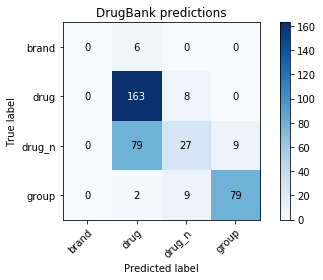

In [175]:
# Plot non-normalized confusion matrix
class_names = le.classes_
plot_confusion_matrix(Y_test_enc, Y_pred, classes=class_names, title="DrugBank predictions")
plt.show()

In [176]:
df_test[['e_name', 'e_type']].groupby(['e_type']).count()

,e_name
e_type,
brand,6
drug,171
drug_n,115
group,90
